In [1]:
import pandas as pd 
df=pd.read_csv(r"C:\Users\KESAVAN SEKAR\OneDrive\Desktop\electronics_sample.csv")
df.head()

,overall,vote,reviewTime,reviewText,summary
0,2,0,2010-02-10,Tech support is the worst,1265760000
1,2,0,2016-10-24,Screws were missing from the bracket and beaut...,Spend a little more and get much better.
2,1,0,2017-07-10,Trouble connecting and staying connected via b...,1499644800
3,4,5,2013-05-02,I purchased this unit for our RV to replace an...,Receiver Offers a Lot of Flexibility & Complexity
4,3,0,2013-01-04,It works. Nuff said but the review requires 1...,It's a cable


In [12]:
#remove duplicate rows
df = df.drop_duplicates()
df.duplicated().sum()
#missing values
df.isnull().sum()
#remove rows with missing values
df = df.dropna(subset=['overall'])
df['overall'] = pd.to_numeric(df['overall'])


df['vote'] = df['vote'].fillna(0)
df['vote'] = pd.to_numeric(df['vote'], errors='coerce').fillna(0)

df['reviewTime'] = pd.to_datetime(df['reviewTime'], errors='coerce')

df['reviewTime'] = df['reviewTime'].fillna(df['reviewTime'].min())

df['reviewText'] = df['reviewText'].fillna("")

df['summary'] = df['summary'].fillna("")

df['reviewText'] = df['reviewText'].str.lower()
df['summary'] = df['summary'].str.lower()

df['reviewText'] = df['reviewText'].str.strip()
df['summary'] = df['summary'].str.strip()


In [15]:
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")

stop = set(stopwords.words("english"))

df['reviewText_clean'] = df['reviewText'].apply(
    lambda x: " ".join([w for w in x.split() if w not in stop])
)

df['summary_clean'] = df['summary'].apply(
    lambda x: " ".join([w for w in x.split() if w not in stop])
)


[nltk_data] Downloading package stopwords to C:\Users\KESAVAN
[nltk_data]     SEKAR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
!pip install nltk


  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 14.2 MB/s  0:00:00
Using cached joblib-1.5.2-py3-none-any.whl (308 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)

   ---------------------------------------- 0/5 [tqdm]
   ---------------------------------------- 0/5 [tqdm]
   ---------------------------------------- 0/5 [tqdm]
   ---------------------------------------- 0/5 [tqdm]
   ---------------------------------------- 0/5 [tqdm]
   ---------------------------------------- 0/5 [tqdm]
   ---------------------------------------- 0/5 [tqdm]
   ---------------------------------------- 0/5 [tqdm]
   -------- ------------------------------- 1/5 [regex]
   -------- ------------------------------- 1/5 [regex]
   -------- ------------------------------- 1/5 [regex]
   ---------------- --

In [14]:
import nltk
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("omw-1.4")


[nltk_data] Downloading package stopwords to C:\Users\KESAVAN
[nltk_data]     SEKAR\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to C:\Users\KESAVAN
[nltk_data]     SEKAR\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to C:\Users\KESAVAN
[nltk_data]     SEKAR\AppData\Roaming\nltk_data...


True

In [17]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lm = WordNetLemmatizer()

df['reviewText_clean'] = df['reviewText_clean'].apply(
    lambda x: " ".join([lm.lemmatize(w) for w in x.split()])
)

df['summary_clean'] = df['summary_clean'].apply(
    lambda x: " ".join([lm.lemmatize(w) for w in x.split()])
)


[nltk_data] Downloading package wordnet to C:\Users\KESAVAN
[nltk_data]     SEKAR\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [18]:
df.to_csv("cleaned_reviews.csv", index=False)


In [19]:
!pip install pandas matplotlib wordcloud


  Using cached matplotlib-3.10.7-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.60.1-cp313-cp313-win_amd64.whl.metadata (114 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.7-cp313-cp313-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl (226 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.60.1-cp313-cp313-win_amd64.whl (2.3 MB)
Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl (73 kB)
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ----------------------- ---------------- 4.2/7.0 MB 21.3 MB/s eta 0:00:01
   ---------------------------------------- 7.0/7.0 MB 19.2 MB/s  0:00:00
Using cached pyparsing-3.2.5-py3-no

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud


In [21]:
df = pd.read_csv("cleaned_reviews.csv")
df.head()


,overall,vote,reviewTime,reviewText,summary,reviewText_clean,summary_clean
0,2,0,2010-02-10,tech support is the worst,1265760000,tech support worst,1265760000
1,2,0,2016-10-24,screws were missing from the bracket and beaut...,spend a little more and get much better.,screw missing bracket beauty dish within week....,spend little get much better.
2,1,0,2017-07-10,trouble connecting and staying connected via b...,1499644800,trouble connecting staying connected via bluet...,1499644800
3,4,5,2013-05-02,i purchased this unit for our rv to replace an...,receiver offers a lot of flexibility & complexity,purchased unit rv replace older am/fm/cassette...,receiver offer lot flexibility & complexity
4,3,0,2013-01-04,it works. nuff said but the review requires 1...,it's a cable,"works. nuff said review requires 16 words, 9 w...",cable


In [22]:
total_reviews = len(df)
print("Total Number of Reviews:", total_reviews)


Total Number of Reviews: 19808


In [25]:
from collections import Counter

# Convert all values to string to avoid float errors
df['reviewText_clean'] = df['reviewText_clean'].astype(str)

all_words = " ".join(df['reviewText_clean']).split()
top_words = Counter(all_words).most_common(10)

print("Top 10 Most Frequent Words:")
for word, freq in top_words:
    print(word, ":", freq)


Top 10 Most Frequent Words:
work : 3714
one : 3503
good : 3080
would : 2725
get : 2603
great : 2491
like : 2370
use : 2273
sound : 1792
- : 1766


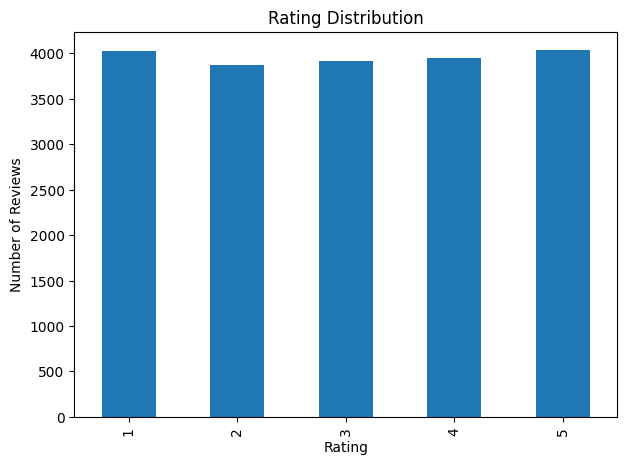

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
df['overall'].value_counts().sort_index().plot(kind='bar')
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Number of Reviews")
plt.show()


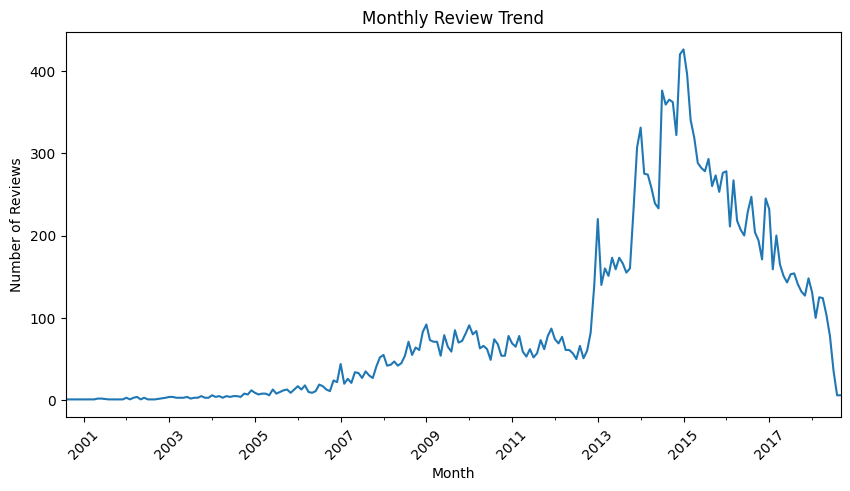

In [27]:
df['reviewTime'] = pd.to_datetime(df['reviewTime'], errors='coerce')
df['month'] = df['reviewTime'].dt.to_period('M')
monthly = df['month'].value_counts().sort_index()

plt.figure(figsize=(10,5))
monthly.plot(kind='line')
plt.title("Monthly Review Trend")
plt.xlabel("Month")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.show()


In [28]:
def vote_category(v):
    if v == 0:
        return "No Votes"
    elif v <= 5:
        return "Low Engagement"
    elif v <= 50:
        return "Medium Engagement"
    else:
        return "High Engagement"

df['category'] = df['vote'].apply(vote_category)


In [29]:
df['category'].value_counts()


category
No Votes             15869
Low Engagement        2508
Medium Engagement     1306
High Engagement        125
Name: count, dtype: int64

In [30]:
df.groupby('category')['overall'].mean()


category
High Engagement      2.936000
Low Engagement       2.631579
Medium Engagement    2.564319
No Votes             3.101015
Name: overall, dtype: float64

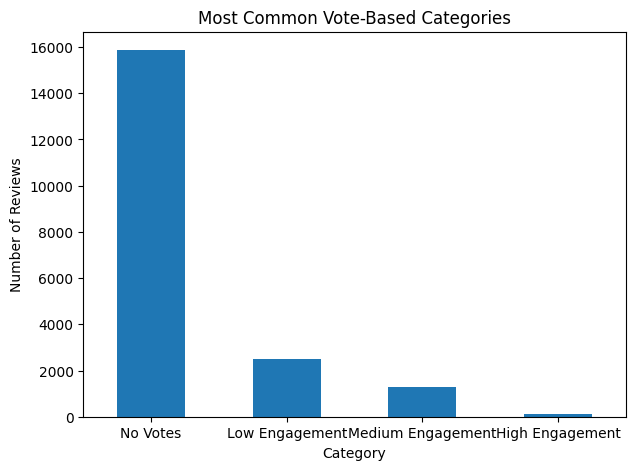

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
df['category'].value_counts().plot(kind='bar')
plt.title("Most Common Vote-Based Categories")
plt.xlabel("Category")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=0)
plt.show()


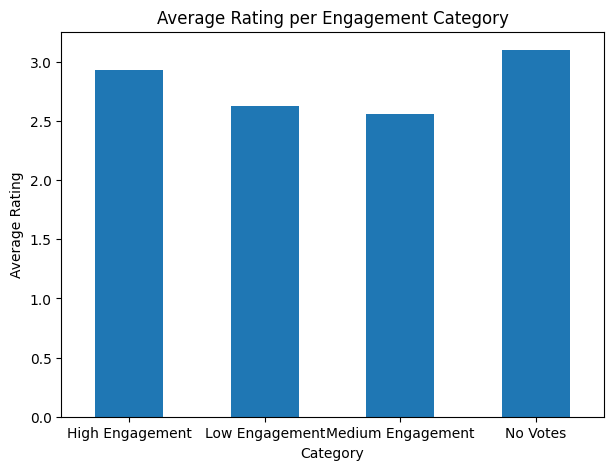

In [32]:
df.groupby('category')['overall'].mean().plot(kind='bar', figsize=(7,5))
plt.title("Average Rating per Engagement Category")
plt.xlabel("Category")
plt.ylabel("Average Rating")
plt.xticks(rotation=0)
plt.show()


In [33]:
df.to_csv("final_cleaned_reviews.csv", index=False)
